<a href="https://colab.research.google.com/github/belovelace/Machine_learning_class/blob/main/Activity_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인간 활동 인식 실험 개요

## 실험 대상
- **참가자**: 30명의 지원자 (19-48세)
- **장비**: 허리에 착용한 스마트폰 (삼성 갤럭시 S II)

## 수행 활동
실험 참가자들이 수행한 6가지 활동:

1. **WALKING** - 걷기
2. **WALKING_UPSTAIRS** - 계단 오르기  
3. **WALKING_DOWNSTAIRS** - 계단 내려가기
4. **SITTING** - 앉기
5. **STANDING** - 서기
6. **LAYING** - 누워있기

## 데이터 수집 방법

### 센서 데이터
- **사용 센서**: 가속도계 및 자이로스코프 (스마트폰 내장)
- **측정 데이터**:
  - 3축 선형 가속도
  - 3축 각속도
- **샘플링 속도**: 50Hz (일정한 속도)

### 라벨링
- 실험 과정을 **비디오로 녹화**
- **수동으로 데이터 라벨링** 수행

## 데이터셋 구성

데이터를 무작위로 분할:

| 구분 | 비율 | 용도 |
|------|------|------|
| 훈련 데이터 | 70% | 모델 학습용 |
| 테스트 데이터 | 30% | 모델 평가용 |

## 연구 목적

**인간 활동 인식(Human Activity Recognition)** 연구를 위한 데이터셋으로, 머신러닝 모델이 스마트폰 센서 데이터만으로 사람의 활동을 자동으로 분류할 수 있도록 훈련시키는 데 활용됩니다.

In [26]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [27]:

# 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
TRAIN = "train/"
TEST = "test/"

DATASET_PATH = "/content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/"

In [51]:
df = load_dataset()

In [54]:
# Convert NumPy arrays in the tuple to pandas DataFrames for better visualization
trainX_df = pd.DataFrame(df[0].reshape(-1, df[0].shape[-1]))
trainy_df = pd.DataFrame(df[1])
testX_df = pd.DataFrame(df[2].reshape(-1, df[2].shape[-1]))
testy_df = pd.DataFrame(df[3])

# Define a mapping from numerical labels to activity names
activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

print("Training Data (X):")
display(trainX_df.head())

print("\nTraining Labels (y):")
# Map numerical labels to activity names for display
display(trainy_df.head().replace(activity_labels))

print("\nTesting Data (X):")
display(testX_df.head())

print("\nTesting Labels (y):")
# Map numerical labels to activity names for display
display(testy_df.head().replace(activity_labels))

Training Data (X):


,0,1,2,3,4,5,6,7,8
0,0.000181,0.010767,0.055561,0.030191,0.066014,0.022859,1.012817,-0.123217,0.102934
1,0.010139,0.006579,0.055125,0.043711,0.042699,0.010316,1.022833,-0.126876,0.105687
2,0.009276,0.008929,0.048405,0.035688,0.074850,0.013250,1.022028,-0.124004,0.102102
3,0.005066,0.007489,0.049775,0.040402,0.057320,0.017751,1.017877,-0.124928,0.106553
4,0.010810,0.006141,0.043013,0.047097,0.052343,0.002553,1.023680,-0.125767,0.102814



Training Labels (y):


,0
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING



Testing Data (X):


,0,1,2,3,4,5,6,7,8
0,0.011653,-0.029399,0.106826,0.437464,0.531349,0.136528,1.041216,-0.269796,0.023780
1,0.013109,-0.039729,0.152455,0.468264,0.721069,0.097622,1.041803,-0.280025,0.076293
2,0.011269,-0.052406,0.216846,0.498257,0.520328,0.083556,1.039086,-0.292663,0.147475
3,0.027831,-0.052106,0.202581,0.479396,0.372625,0.022861,1.054768,-0.292384,0.139906
4,0.002318,-0.045470,0.176010,0.389894,0.414541,-0.025939,1.028376,-0.285826,0.119934



Testing Labels (y):


,0
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense

# Define TIME_PERIOD based on the shape of the training data
TIME_PERIOD = df[0].shape[1] # This is 128
NUM_FEATURES = df[0].shape[2] # This is 9

model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = (TIME_PERIOD, NUM_FEATURES, 1)))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation="softmax"))


model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 127, 8, 16)     │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 127, 8, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 7, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 126, 7, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,806,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,808,950 (6.90 MB)

 Trainable params: 1,808,950 (6.90 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
from tensorflow.keras.optimizers import Adam

# Reshape data for Conv2D input (add channel dimension)
trainX_reshaped = df[0].reshape(df[0].shape[0], TIME_PERIOD, df[0].shape[2], 1)
testX_reshaped = df[2].reshape(df[2].shape[0], TIME_PERIOD, df[2].shape[2], 1)

# Convert labels to 0-indexed
trainy_0indexed = df[1] - 1
testy_0indexed = df[3] - 1


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20
history = model.fit(trainX_reshaped, trainy_0indexed, epochs=epochs, validation_data=(testX_reshaped, testy_0indexed), verbose=1)

Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.5874 - loss: 0.9181 - val_accuracy: 0.7598 - val_loss: 0.5838
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 22s 74ms/step - accuracy: 0.7761 - loss: 0.5231 - val_accuracy: 0.8147 - val_loss: 0.4790
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.8445 - loss: 0.3967 - val_accuracy: 0.8636 - val_loss: 0.4042
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.8813 - loss: 0.2926 - val_accuracy: 0.8707 - val_loss: 0.3841
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.9010 - loss: 0.2524 - val_accuracy: 0.8853 - val_loss: 0.3601
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - accuracy: 0.9020 - loss: 0.2306 - val_accuracy: 0.8911 - val_loss: 0.3516
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9119 - loss: 0.2075 - val_accuracy: 0.8935 - val_loss: 0.3603
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9247 - loss: 0.1837 - 

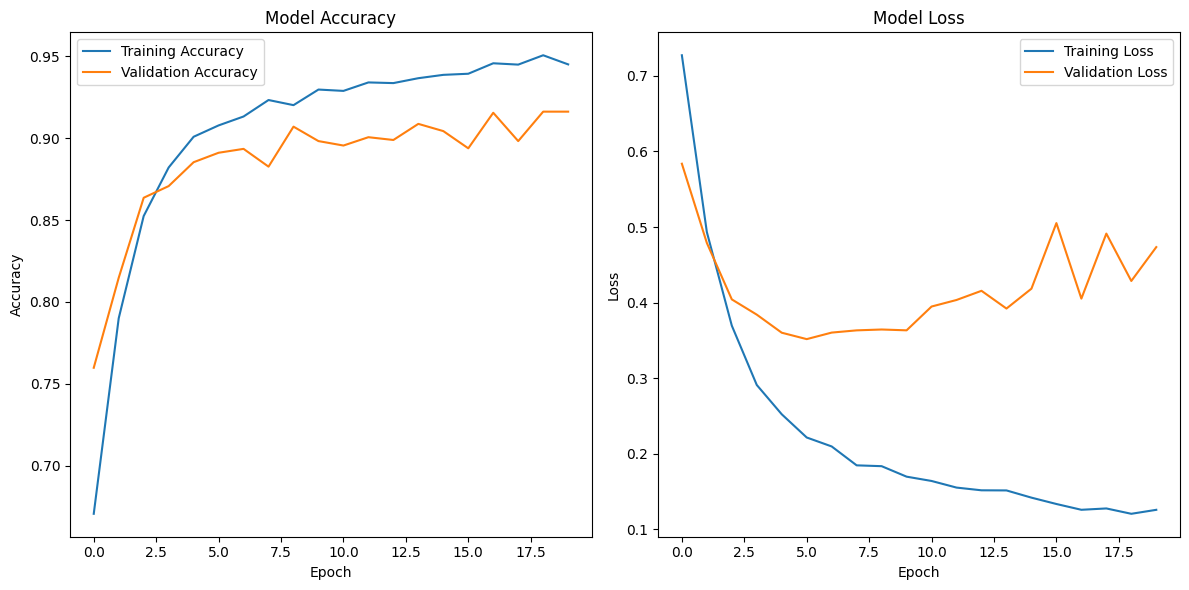

In [62]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [63]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(testX_reshaped, testy_0indexed, verbose=0)

# Print the test accuracy and loss
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Test Loss: 0.4735
Test Accuracy: 0.9162


In [64]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = model.predict(testX_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert test labels back to original 1-indexed for the report
testy_original_indexed = testy_0indexed + 1

# Define target names using the activity_labels dictionary
target_names = [activity_labels[i] for i in sorted(activity_labels.keys())]

# Generate and print the classification report
print(classification_report(testy_original_indexed, y_pred_classes + 1, target_names=target_names))

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
                    precision    recall  f1-score   support

           WALKING       0.97      0.89      0.93       496
  WALKING_UPSTAIRS       0.89      0.91      0.90       471
WALKING_DOWNSTAIRS       0.85      0.98      0.91       420
           SITTING       0.90      0.81      0.86       491
          STANDING       0.88      0.91      0.89       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.91      2947
      weighted avg       0.92      0.92      0.92      2947

